In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import scipy.io
from gudhi.representations.preprocessing import BirthPersistenceTransform, DiagramScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from preprocessing import *
from visualization import *

In [4]:
data_path = "./pds.mat"
data_mat = scipy.io.loadmat(data_path)
data = data_mat["pds"]

In [16]:
X = data.reshape(-1)
y=None

pipe = make_pipeline(BirthPersistenceTransform(), 
               DiagramScaler(use=True, 
                             scalers=[
                                 ((0,), MaxAbsScaler(copy=False)),
                                 ((1,), MaxAbsScaler(copy=False))]))

preprocessed = np.array(pipe.fit_transform(X, y))

In [ ]:
all_points = np.concatenate(preprocessed)
plt.title("Full data")
plt.scatter(all_points[:, 0], all_points[:, 1], s=0.5)

# Visualization of random sampler with different weight functions

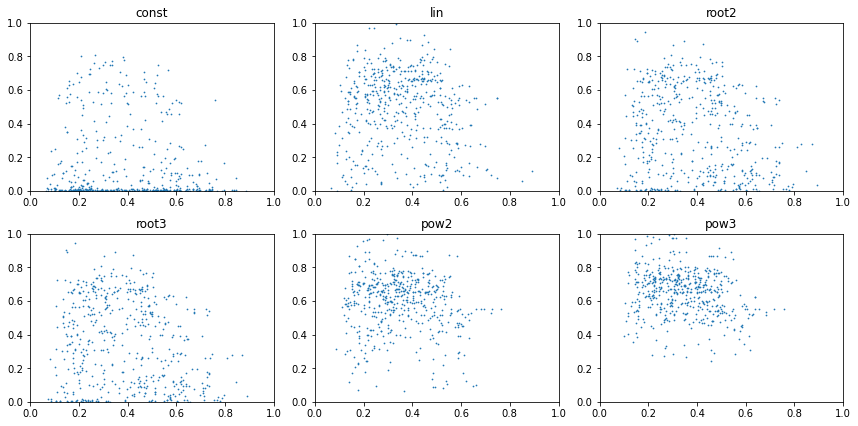

In [14]:
#Different persistence weighting functions visualization
sampling_weights = {
    "const": None,
    "lin" : lambda x : x[1],
    "root2" : lambda x : x[1]**(1/2),
    "root3" : lambda x : x[1]**(1/2),
    "pow2" : lambda x : x[1]**2,
    "pow3" : lambda x : x[1]**3,
}

index = 1
fig = plt.figure(figsize=(12,6))

for name, weight in sampling_weights.items():
    transformed = RandomPDSampler(500, weight, random_state=42).fit_transform(preprocessed, y)[0]
    
    ax = fig.add_subplot(2,3,index)
    ax.set_title(name)
    ax.scatter(transformed[:, 0], transformed[:, 1], s=0.5)
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    
    index += 1
    
fig.tight_layout(pad=1.0)

# Visualization of grid sampler with different weight functions

In [ ]:
sampling_weights = {
    "const": None,
    "lin" : lambda x : x[1],
    "root2" : lambda x : x[1]**(1/2),
    "root3" : lambda x : x[1]**(1/2),
    "pow2" : lambda x : x[1]**2,
    "pow3" : lambda x : x[1]**3,
}

index = 1
fig = plt.figure(figsize=(12,6))

for name, weight in sampling_weights.items():
    transformed = GridPDSampler((10,10), 50, weight, random_state=42).fit_transform(preprocessed, y)[0]
    
    ax = fig.add_subplot(2,3,index)
    ax.set_title(name)
    ax.scatter(transformed[:, 0], transformed[:, 1], s=0.5)
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    
    index += 1
    
fig.tight_layout(pad=1.0)